In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font sixe="5" color="red">ch12 데이터시각화 </font></b>
(https://pypi.org/project/matplotlib)
(https://matplotlib.org/stable/api/index)

- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
- matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능과 groupby 기능 포함된 라이브러리

## 1.1 패키지 import 및 기본 설정

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#한글설정
plt.rc('font',family='Malgun Gothic') #윈도우즈. 애플은 Apple
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False) #마이너스 -깨짐 방지 

%config InlineBackend.figure_format = 'retina'

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터준비
    2. 그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장 

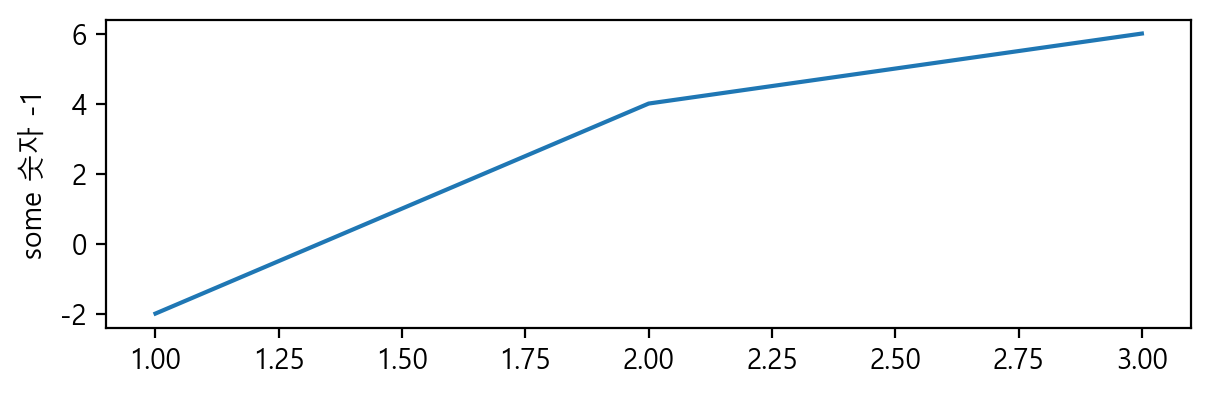

In [7]:
x= [1,2,3] #1)데이터준비
y=[-2,4,6]
plt.figure(figsize=(7,2)) #2)그래프객체생성
plt.plot(x,y) #3)그래프함수
plt.ylabel('some 숫자 -1') #4)커스터마이징

plt.show() #5)그래프 화면 출력 cf)plt.savefig

## 1.3 그래프영역나누기
### 1)subplot 함수로 서브플롯 추가

In [40]:
import numpy as np
x= np.arange(0,10,0.01)
len(x)

1000

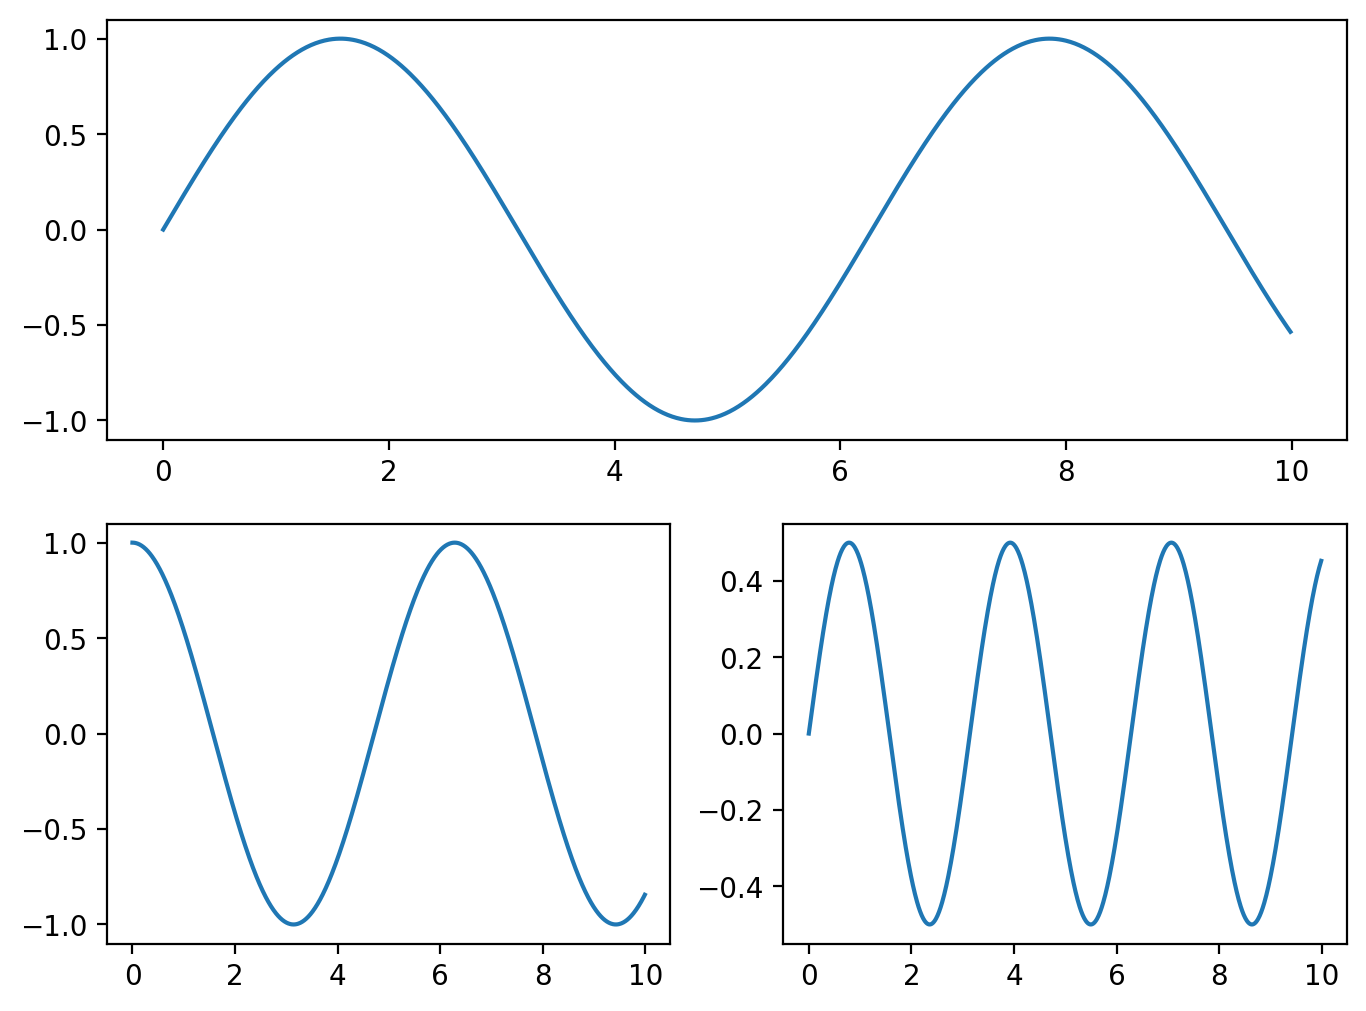

In [41]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1) ; plt.plot(x, np.sin(x))
plt.subplot(2,2,3) ; plt.plot(x, np.cos(x))
plt.subplot(224) ; plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots() 함수로 서브플롯 추가

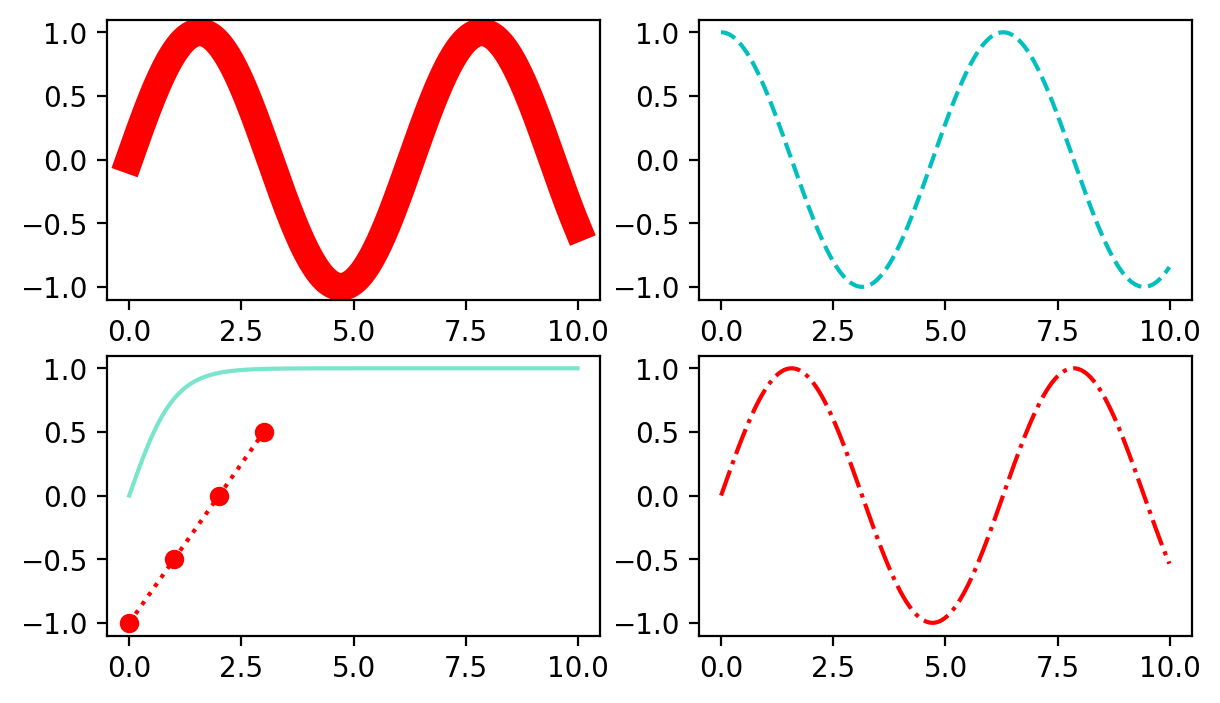

In [42]:
#2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize =(7,4))
axes[0,0].plot(x,np.sin(x), 'r' , linewidth=10)
axes[0,1].plot(x,np.cos(x), 'c--')# color='c' ,linestyle= ':','--','-'
axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'ro:') #color: 'r', marker='0'
axes[1,0].plot(x,np.tanh(x),'#79E5CB')
axes[1,1].plot(x,np.sin(x),'r-.')
# plt.savefig('a.jpg')
plt.show()

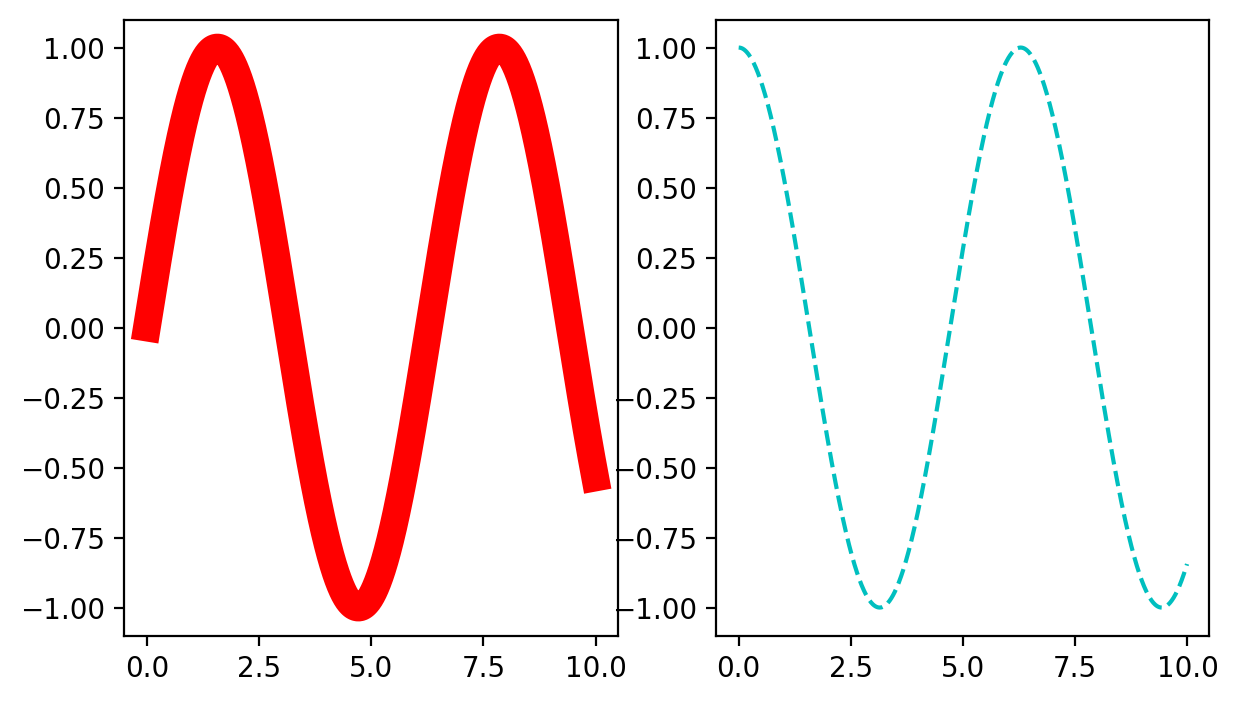

In [43]:
# 2행2열 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))
axes[0].plot(x, np.sin(x), 'r', linewidth=10)
axes[1].plot(x, np.cos(x), 'c--')#color='c', linestyle=':','--','-'

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind='line' figsize, title, xlim, ylim...)
- kind : line(기본값), scatter(점도표), bar, barh, box, pie, density,...
- xlim, ylim : list/tuple

In [17]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()


,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,virginica


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot: 범례사용

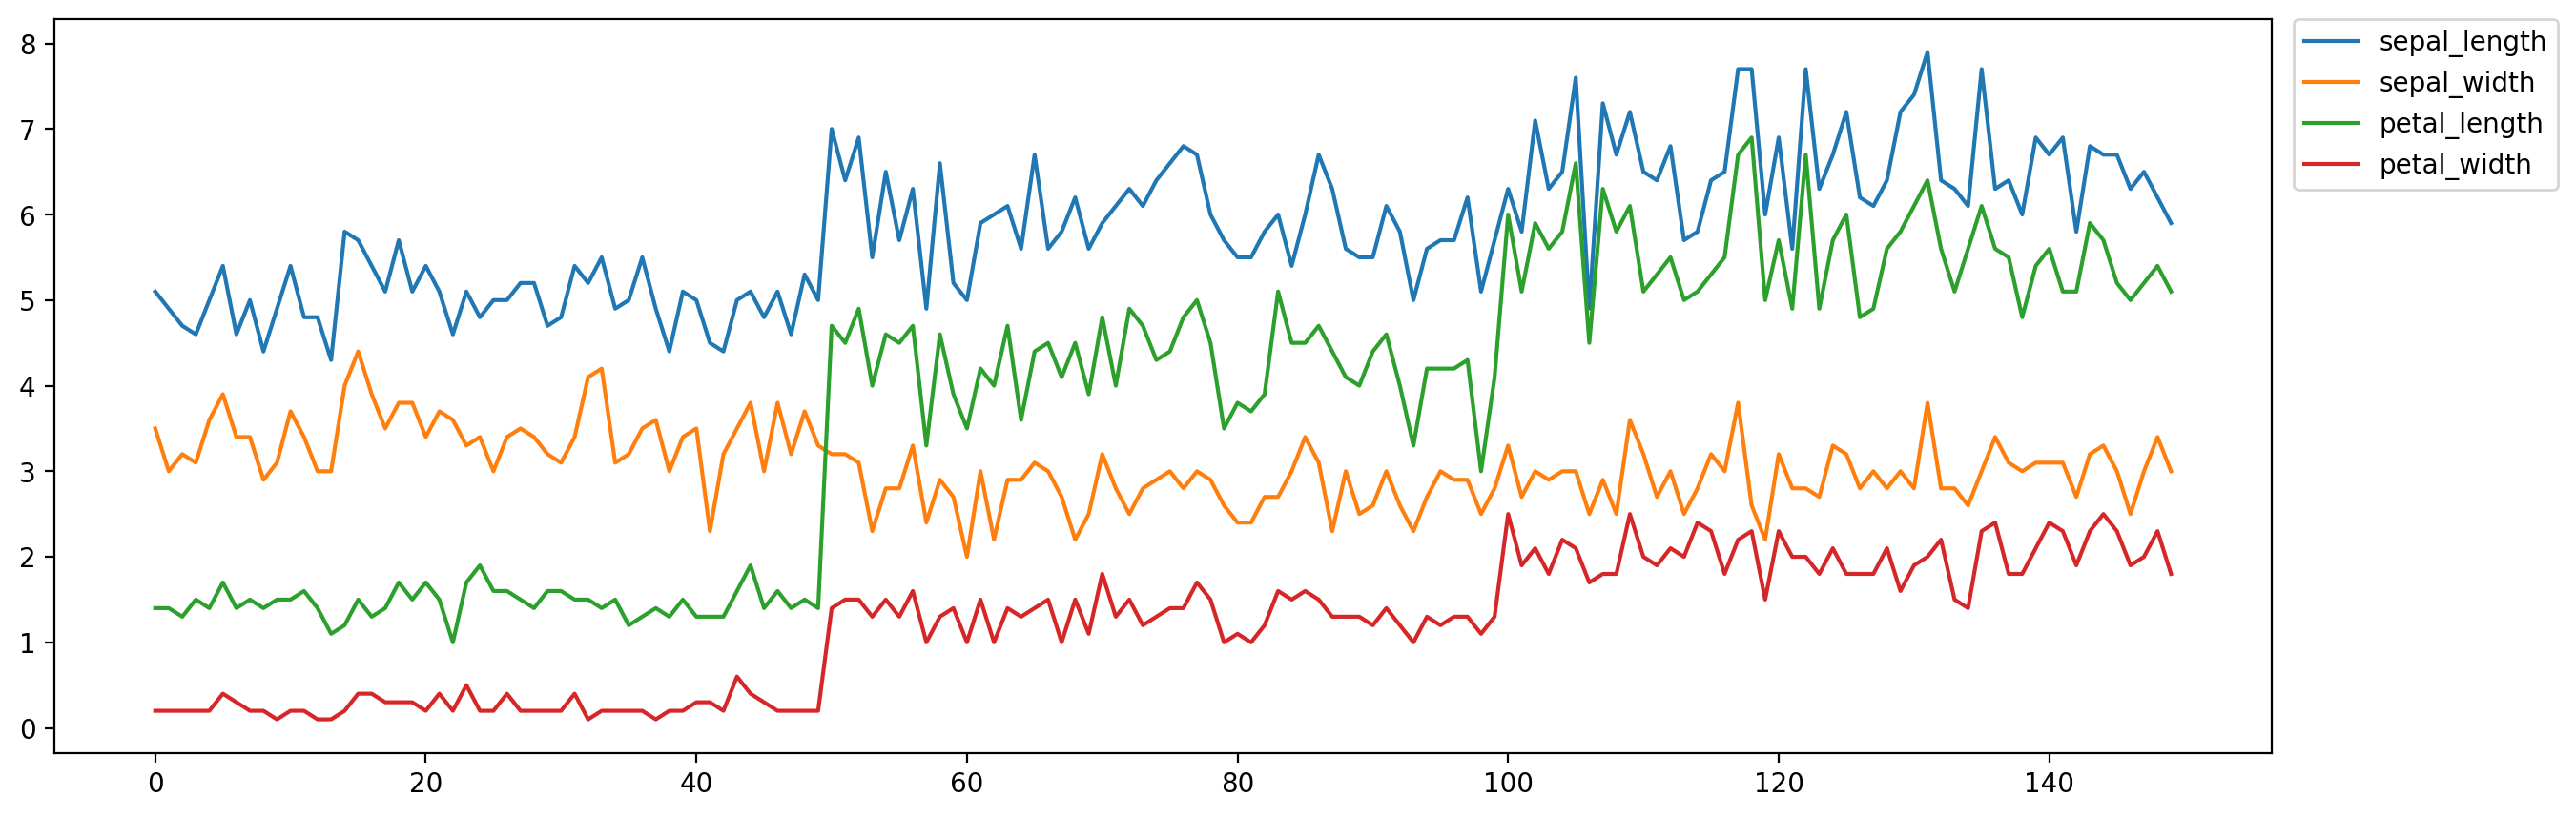

In [18]:
iris.plot(kind='line', figsize=(15,5))
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig('data/ch12_iris.jpg')
plt.show()

In [44]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

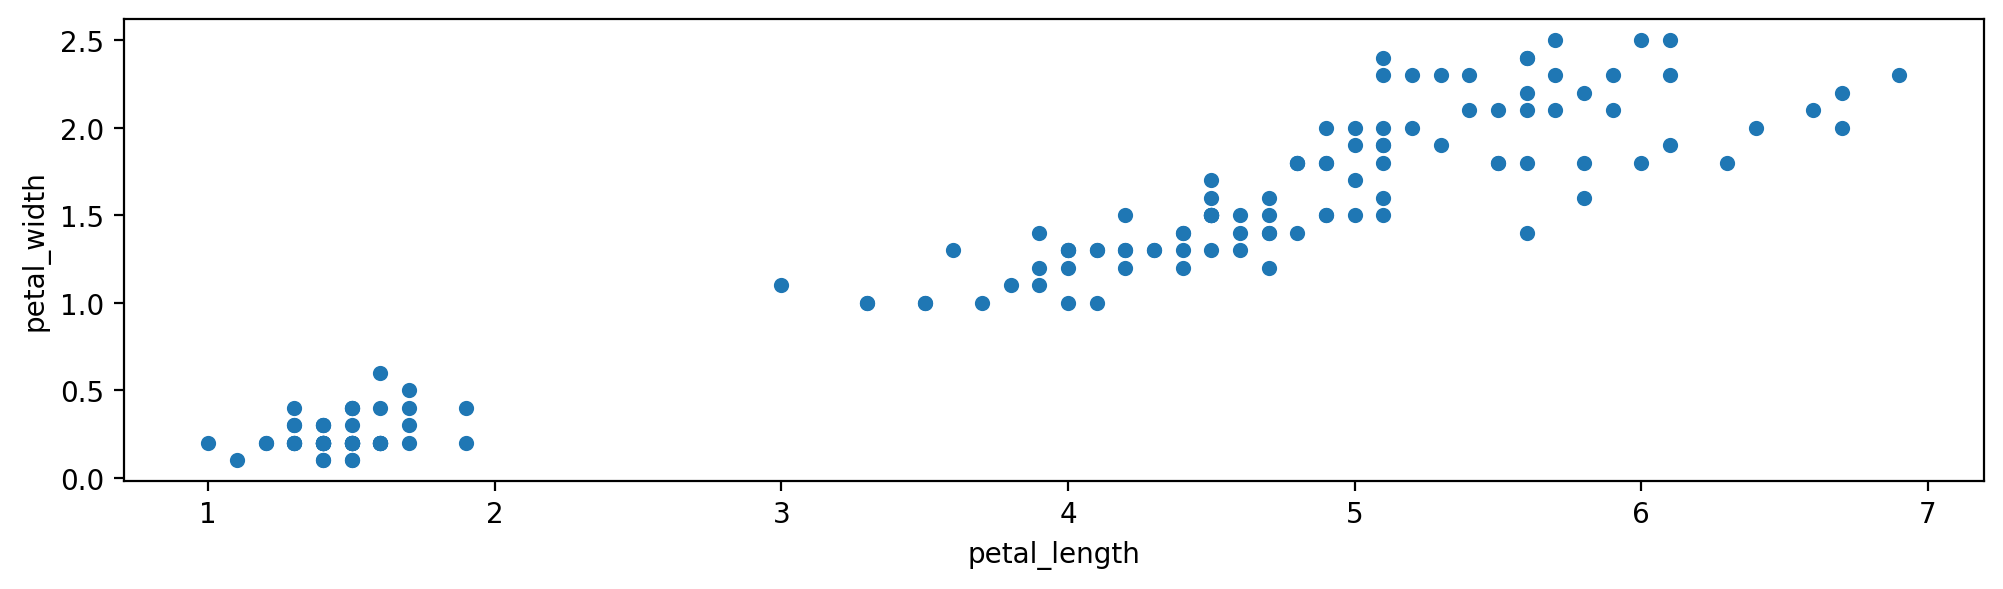

In [20]:
iris.plot(x= 'petal_length',y='petal_width', kind = 'scatter',figsize =(12,3))
plt.show

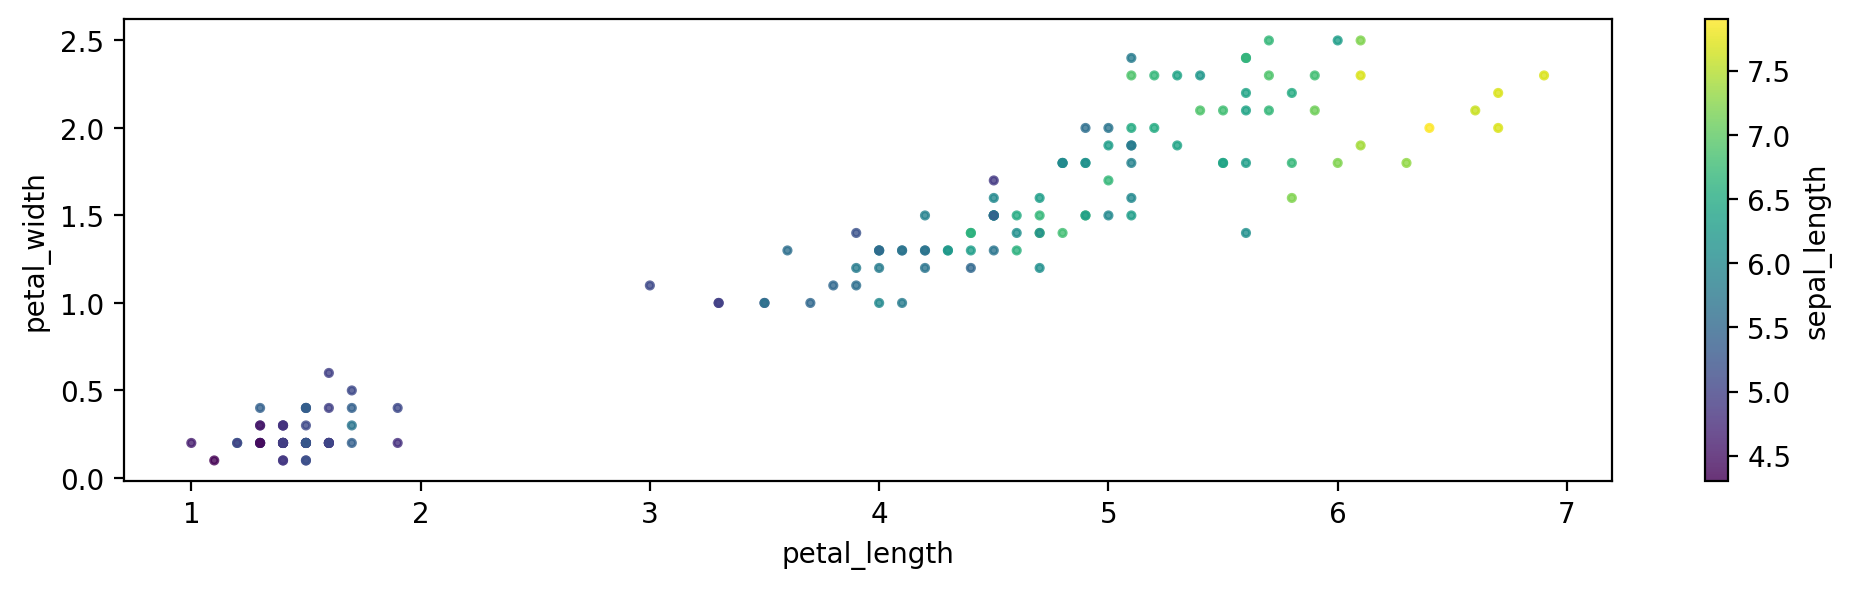

In [49]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='petal_length', #size
         c='sepal_length', # color
         alpha=.8) # 0<=투명도<=1 
plt.show()

             

<function matplotlib.pyplot.show(close=None, block=None)>

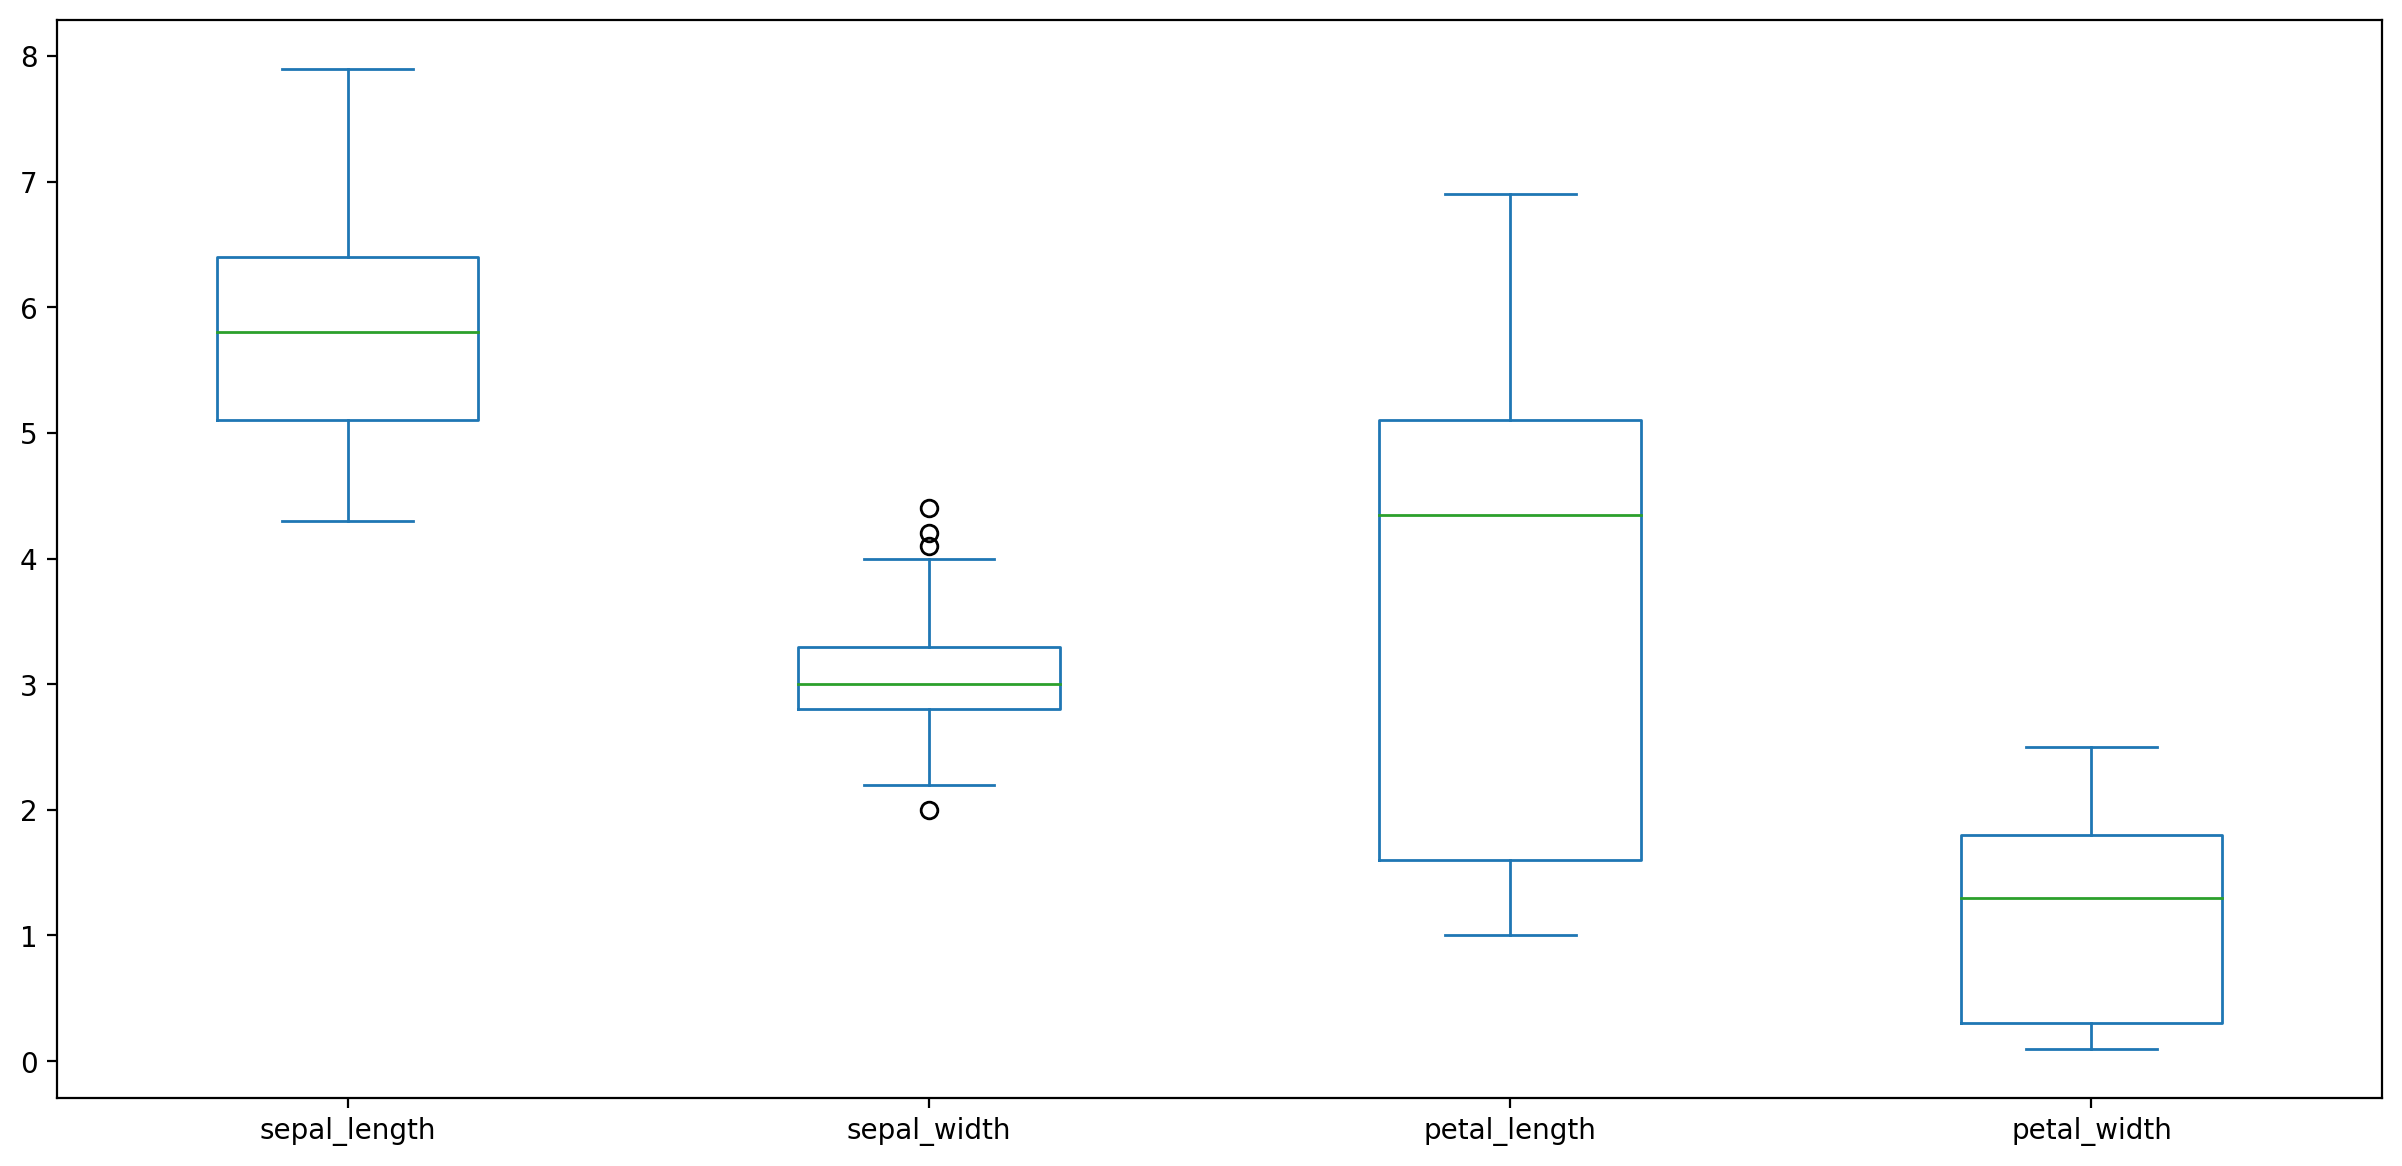

In [21]:
iris.plot(kind='box',figsize=(15,7))
plt.show

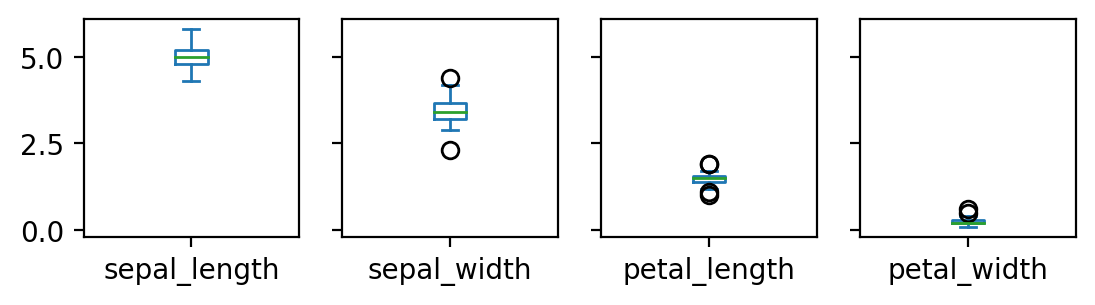

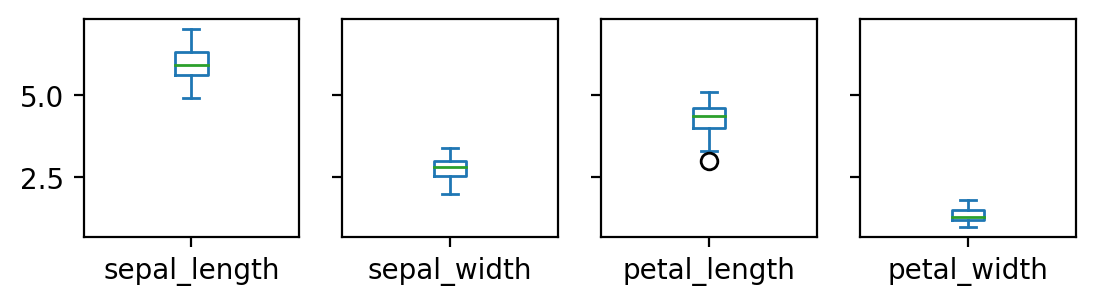

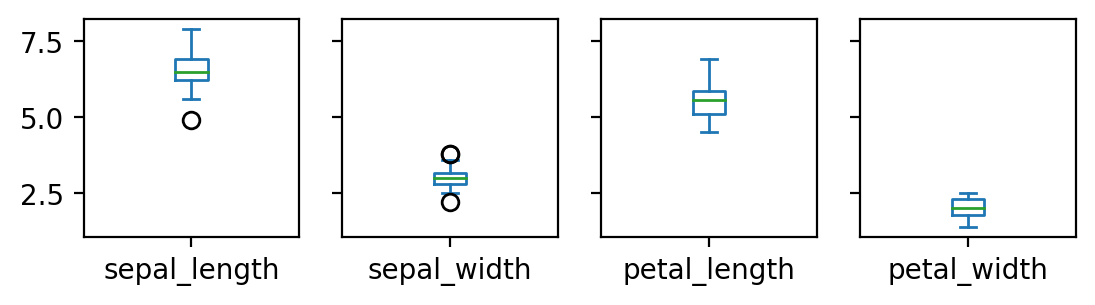

In [25]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharey=True, # 축공유
                            )
plt.show()


## 1.4 다양한 그래프 그리기
### 1) plt.scatter(): 산점도

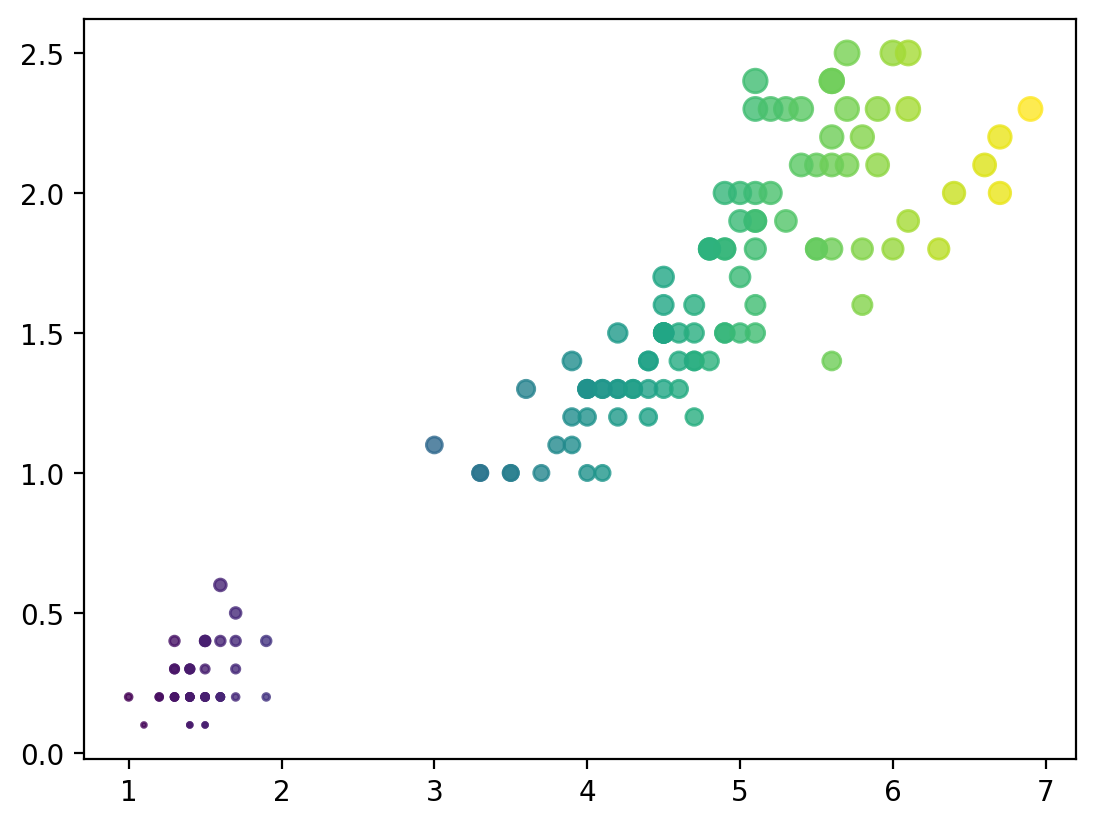

In [50]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30,  # size
           c=iris.petal_length*20, # color
           alpha=.8)

### 2) boxplot(단점 분포를 몰라), violinplot()

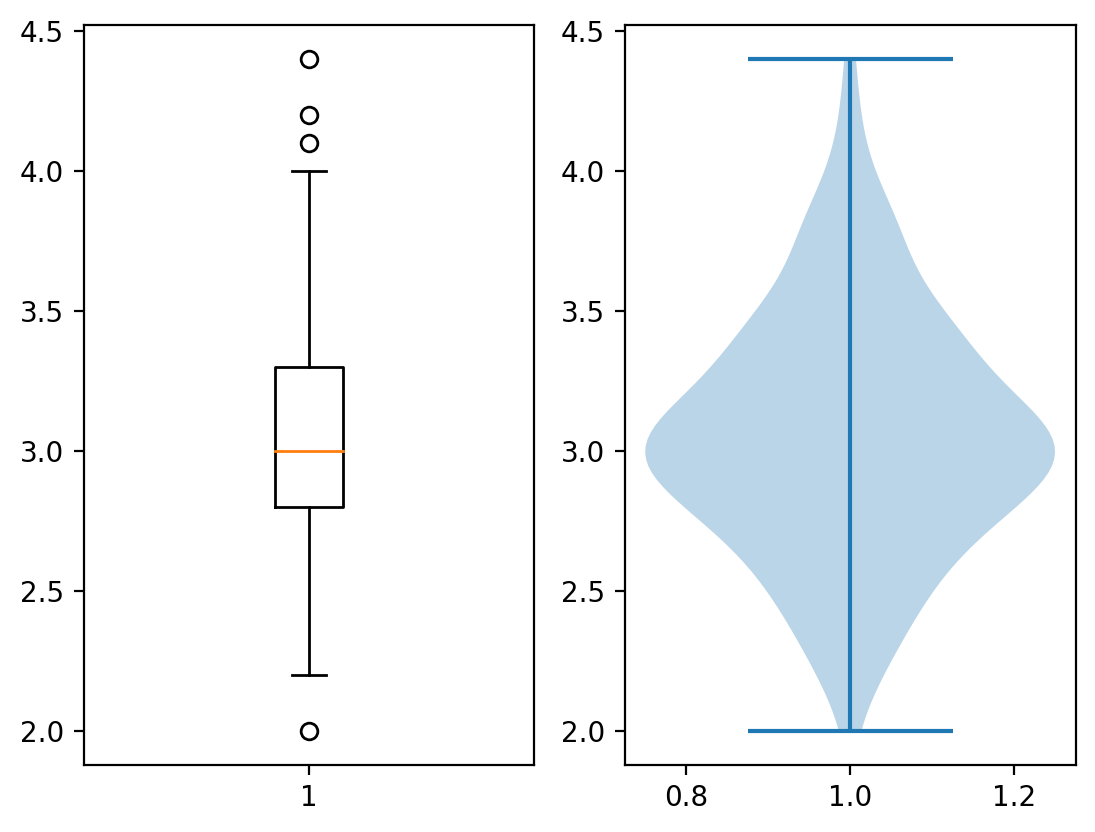

In [37]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()


### 3)bar(), barh(), axvline(수직선), axhline(수평선)

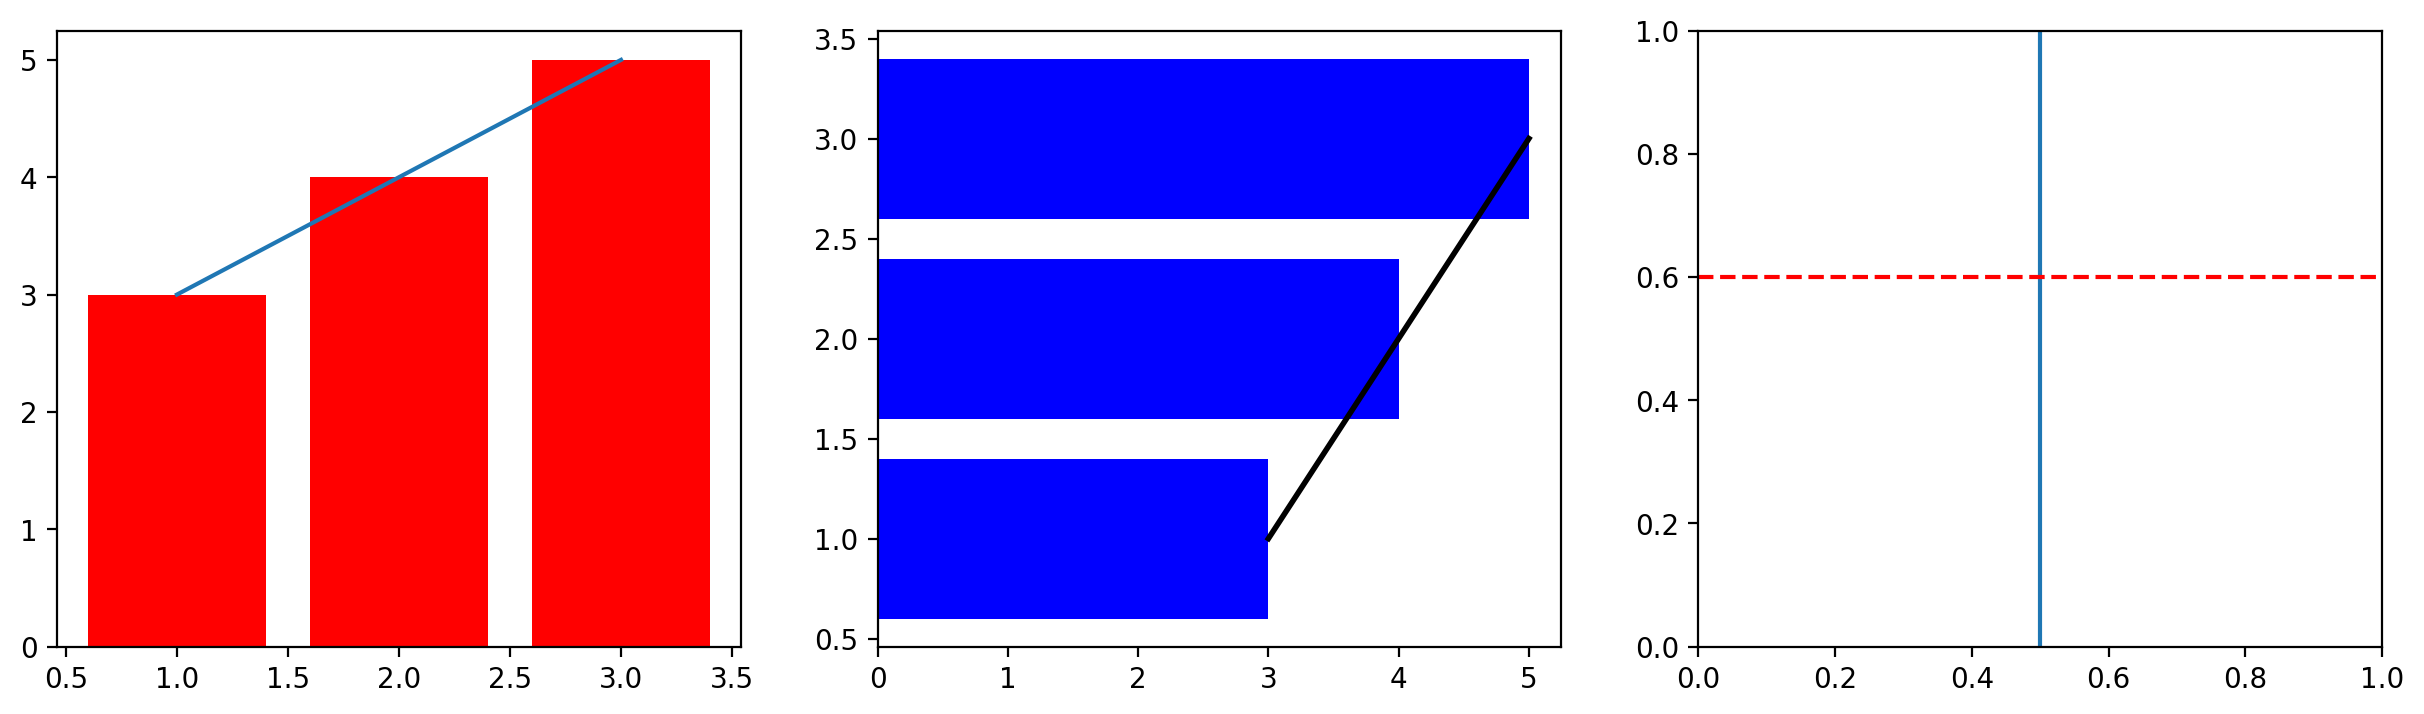

In [36]:
x= [1,2,3]
y=[3,4,5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4)) #1행 3열
axes[0].bar(x,y,color='r')
axes[0].plot(x,y)
axes[1].barh(x,y,color = 'b')
axes[1].plot(y,x, 'k', linewidth=2) # k:black
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')


### 4) hist(도수분포표: histogram)

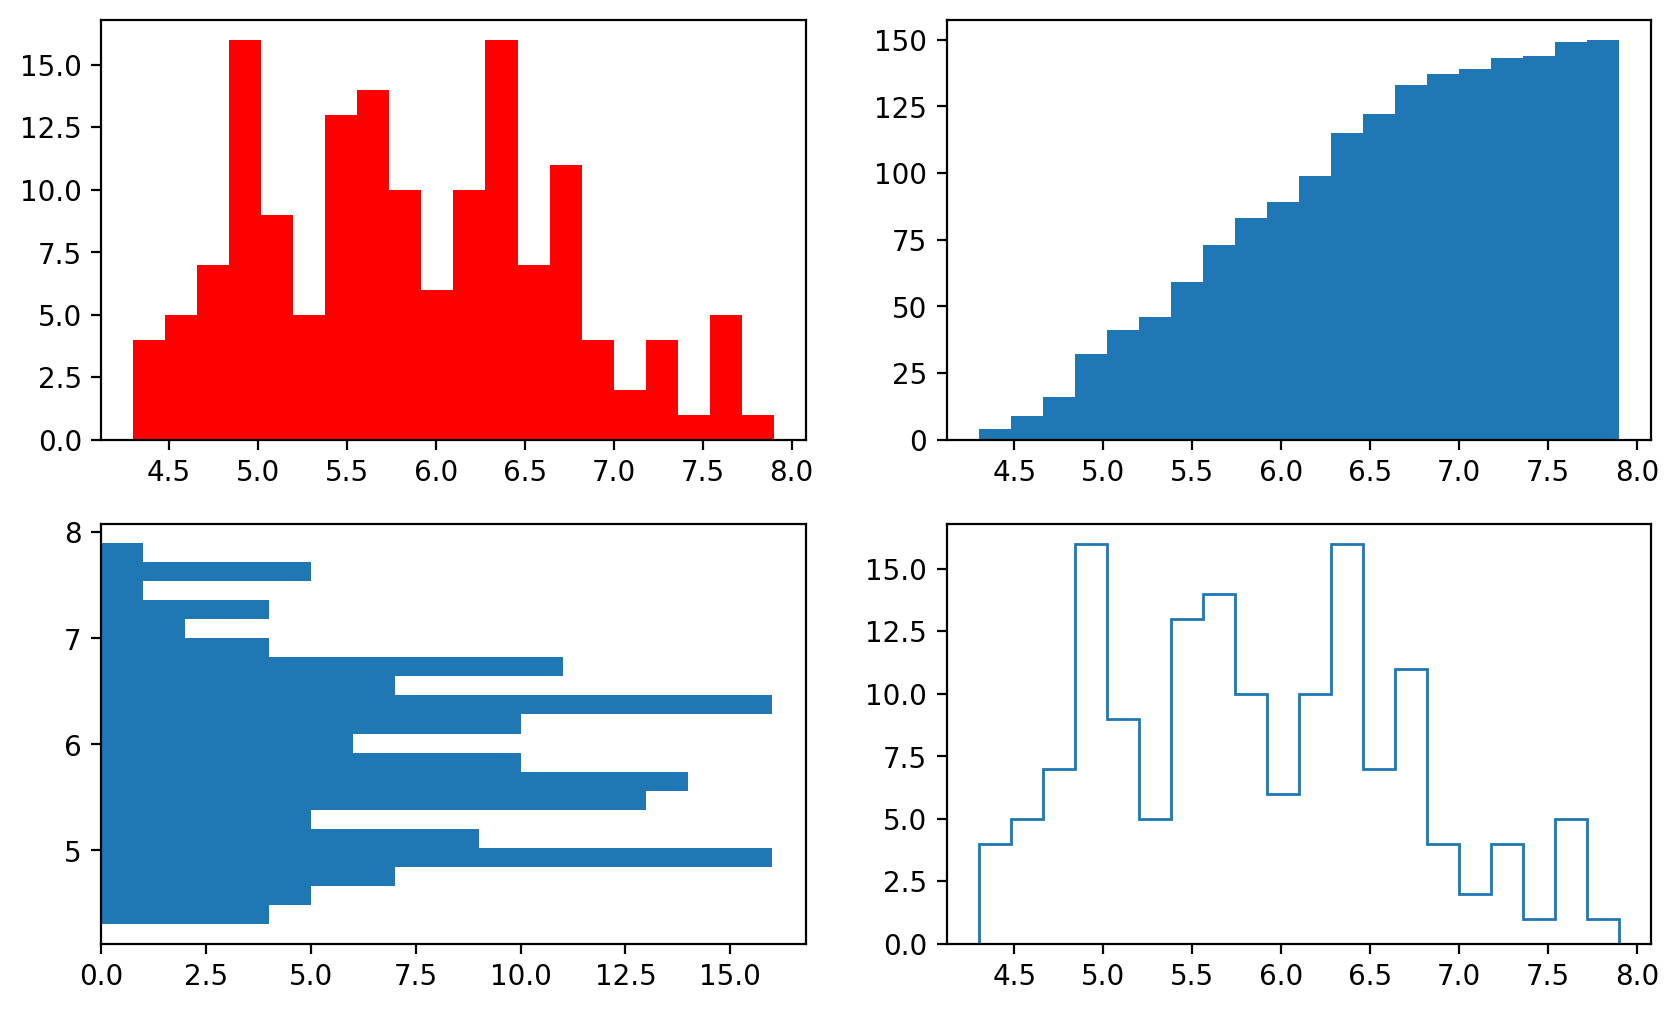

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') #히스토그램 (도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, cumulative = True) #s누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') #수평히스토그램 (도수분포표)
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

## 1.5 그래프커스터마이징
### 1) linestyle, linewidth, color, marker... (plot의 매개변수로 지정)
### 2) text(), annotate()

In [15]:
# 개별 폰트 설정 방법 
from matplotlib.font_manager import FontProperties
font_path = 'C:\Windows\Fonts/HMFMPYUN.TTF'
font_prop = FontProperties(fname= font_path, size =20)

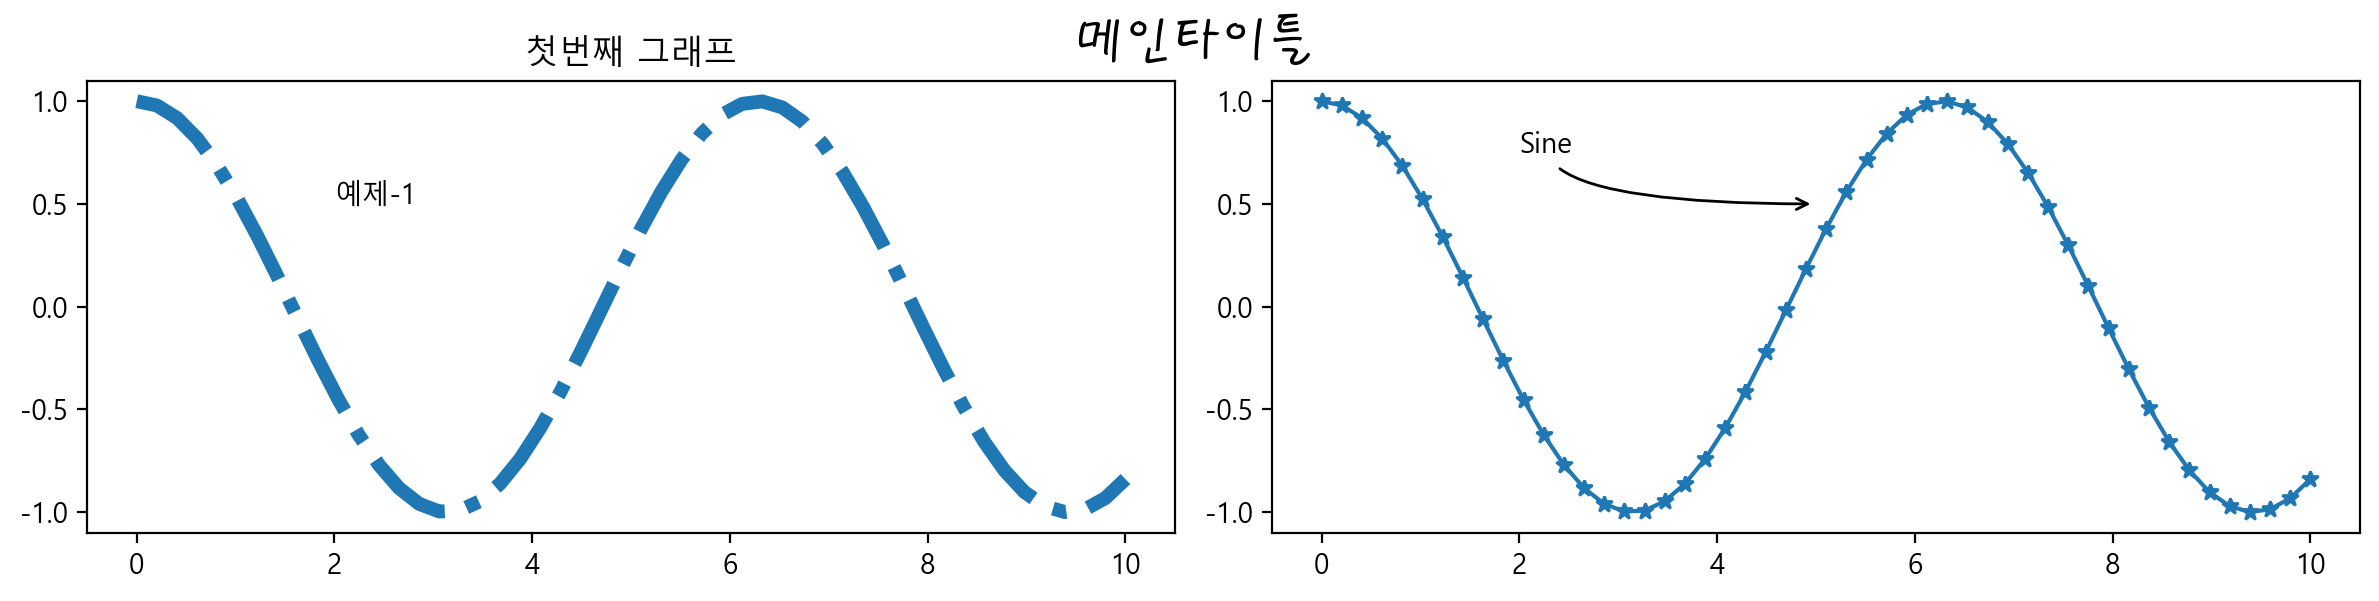

In [30]:
import numpy as np
x= np.linspace(0,10)#num=50
y=np.cos(x)
fig, axes = plt.subplots(1,2,figsize=(12,3))
axes[0].plot(x,y,linewidth=5,linestyle='-.')
axes[0].text(2,0.5,'예제-1')
axes[0].set_title('첫번째 그래프')
axes[1].plot(x,y,marker='*')
axes[1].annotate('Sine',xytext=(2,0.75), #글자가 있을 좌표 위치(좌하단)
            xy=(5,0.5), #화살표가 가리킬 좌표 위치
            arrowprops=dict(arrowstyle='->',connectionstyle='angle3') #angle(꺽은선),arc(직선),...
            )
plt.tight_layout() #left, bottom, right, top : 경계의 상대적 비율
plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 03) 수학기호

In [ ]:
plt.scatter(x,y,marker = '.')
plt.title(r'$\alpha_i > \beta_i$')

### 04)축과 눈금

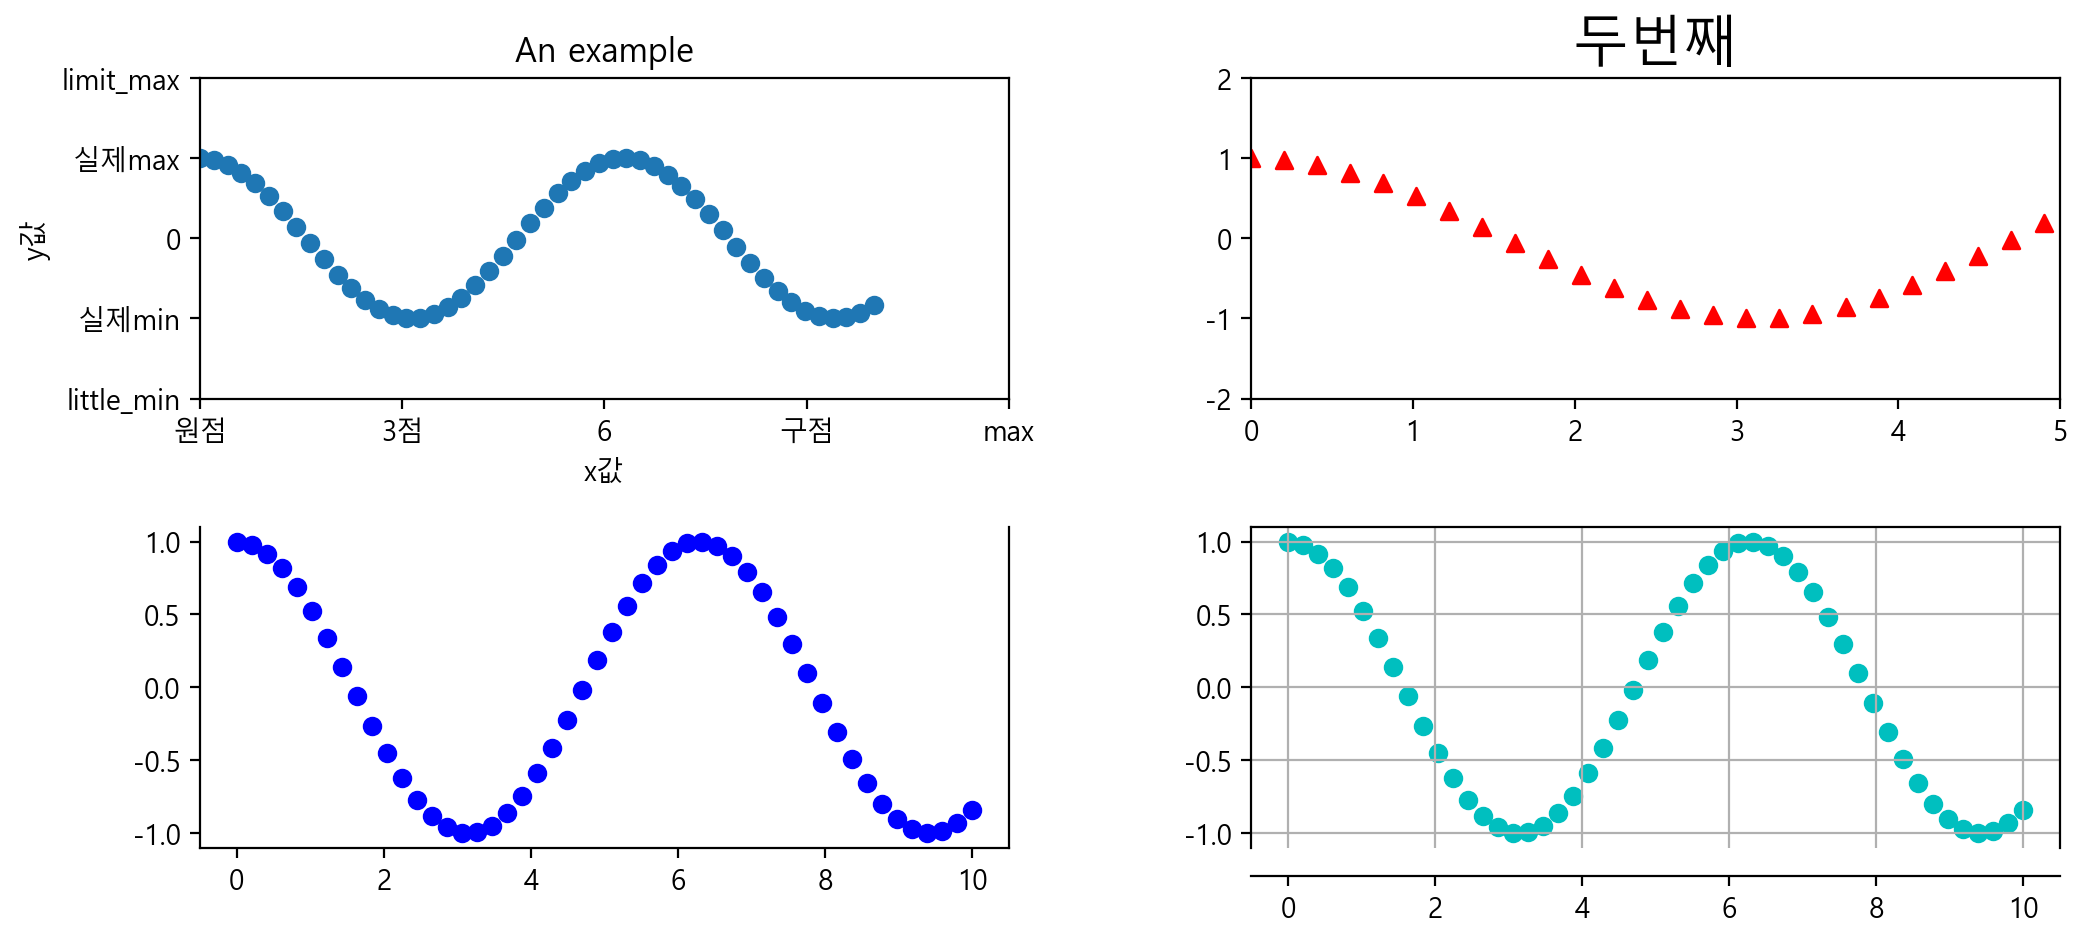

In [2]:
import numpy as np
x= np.linspace(0,10) #0, 10까지 50개 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2,2,figsize=(12,5))
#서브플롯끼리 여백 조정 (hspace 위아래 여백, wsapce 좌우여백)
plt.subplots_adjust(hspace=0.4,wspace=0.3)
axes[0,0].scatter(x,y)
axes[0,0].set(title= 'An example',ylabel = 'y값',xlabel='x값',
             xlim=[0,12], #x축 눈금의 범위 
             ylim=[-2,2], #y축 눈금의 범위 
             xticks=[0,3,6,9,12], #x축 눈금 
             xticklabels = ['원점','3점',6,'구점','max'], #x축 눈금라벨
             yticks=[-2,-1,0,1,2], #y축 눈금
             yticklabels = ['little_min','실제min',0,'실제max','limit_max'])

axes[0,1].scatter(x,y,c='r',marker='^')
axes[0,1].set_title('두번째',fontsize=20)
axes[0,1].set_xlim(0,5) #set(xlim=[0,5])
axes[0,1].set_ylim(-2,2)
axes[1,0].scatter(x,y, c='b')
axes[1,0].spines['top'].set_visible(False)
axes[1,1].scatter(x,y,c='c')
axes[1,1].spines['bottom'].set_position(('outward',10))
axes[1,1].grid(True)
plt.show()

### 05) 축공유

In [3]:
x = np.arange(0, 10)
y1 = 0.5*x **2
y2 = -y1


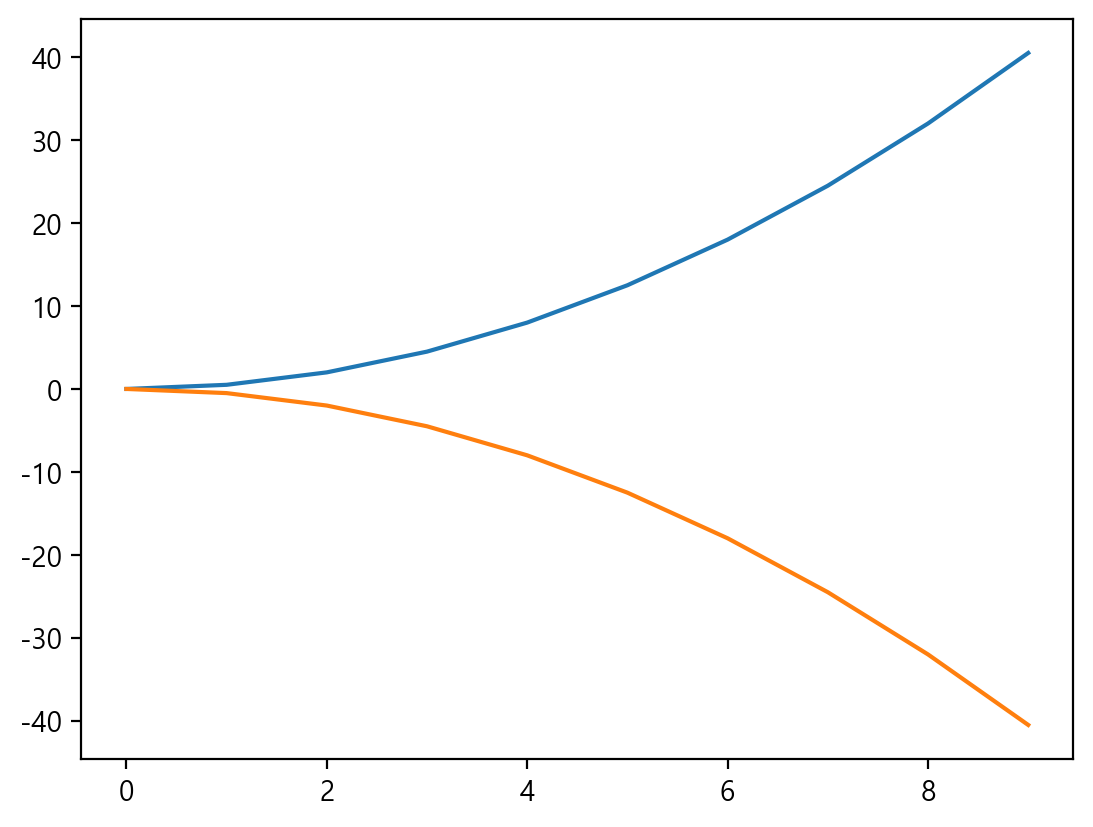

In [35]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


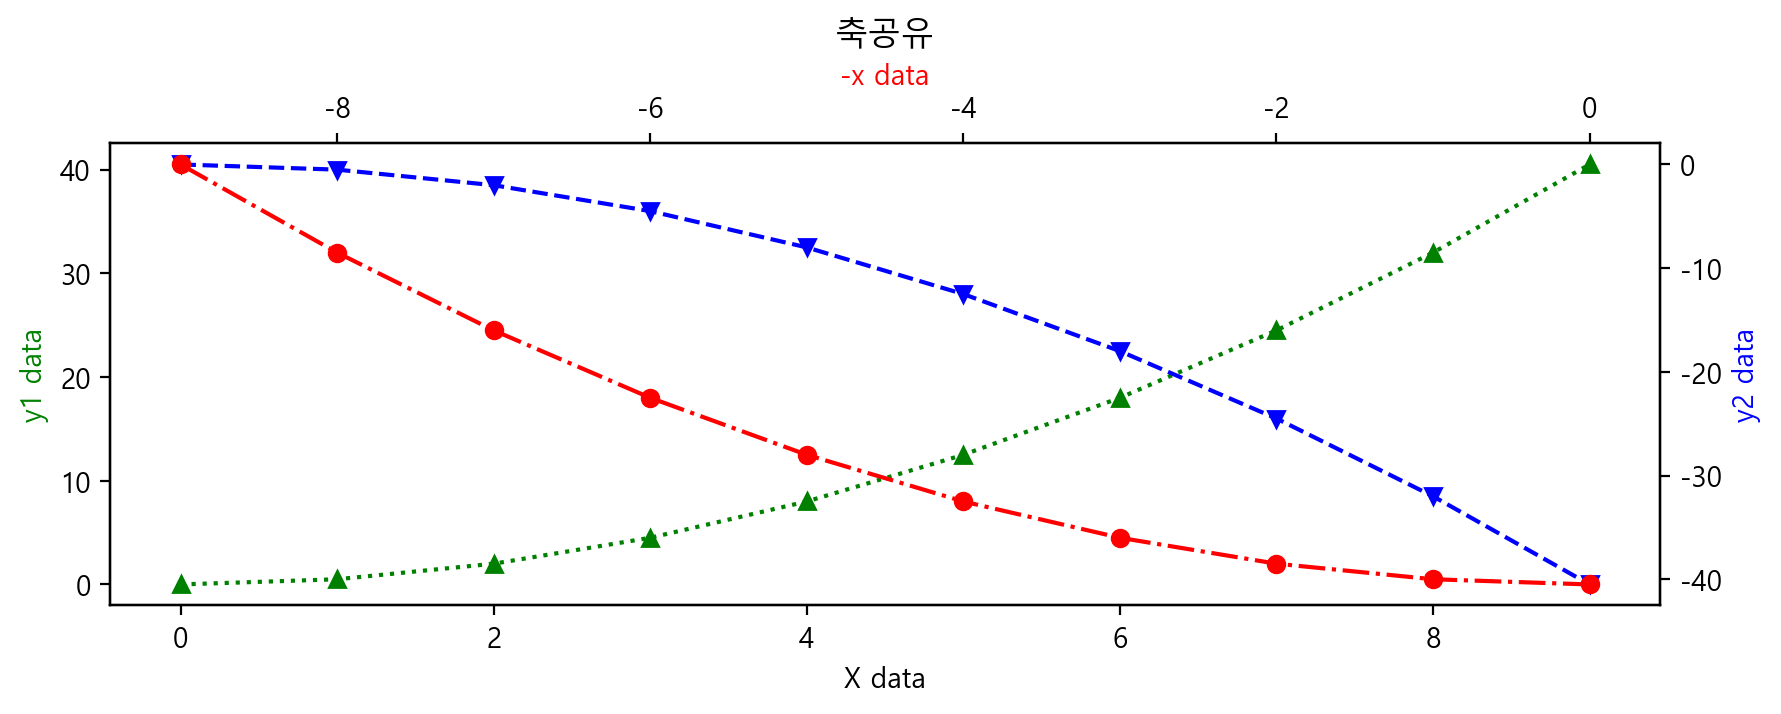

In [4]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x,y1,'g^:')
ax1.set(title = '축공유', xlabel='X data')
ax1.set_ylabel('y1 data', color ='g')

ax2 = ax1.twinx() #ax1과 x축을 공유하는 ax2
ax2.plot(x,y2,'bv--')
ax2.set_ylabel('y2 data',color='b')
ax3 = ax1.twiny() #ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-x data',color = 'r')
plt.show()

### 6)범례
https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot: 범례사용

### 7) 플롯 스타일 지정

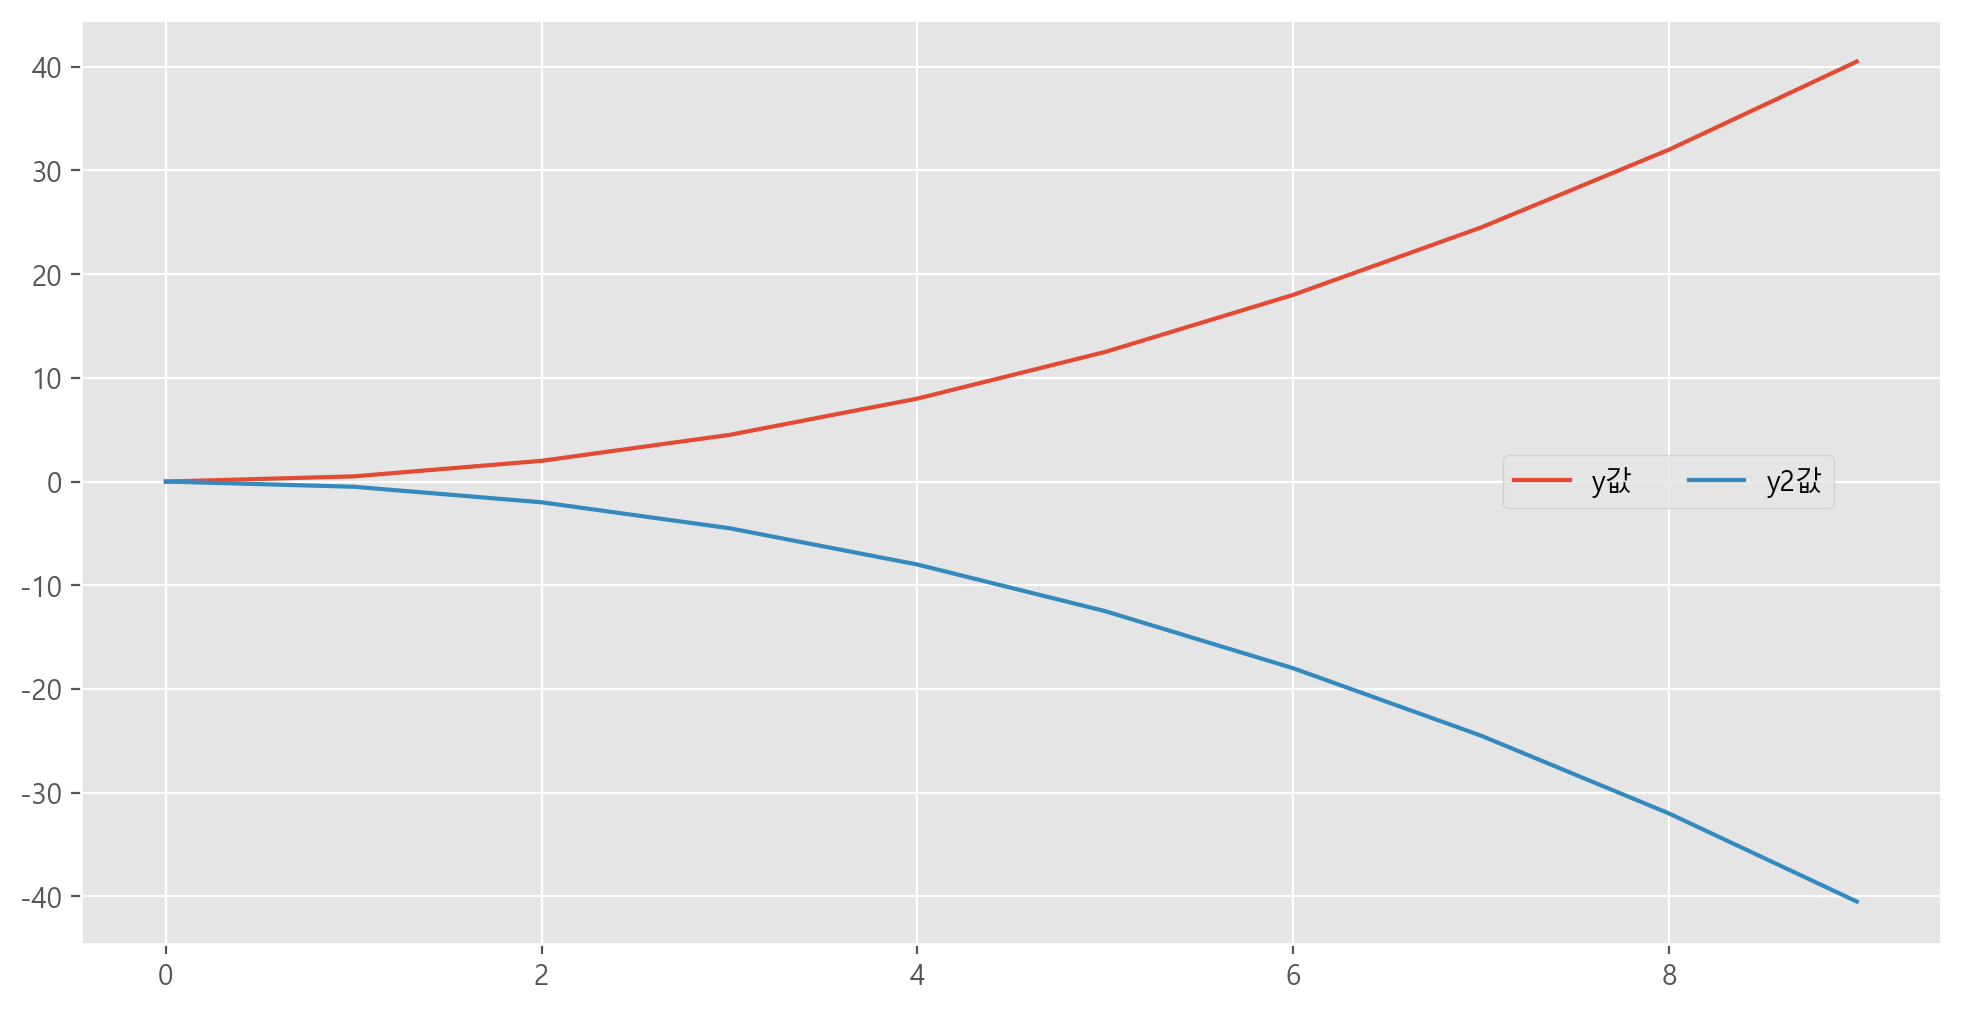

In [5]:
plt.style.use('ggplot') #스타일 지정하는 함수를 씀녀 모든 설정 초기화 
plt.figure(figsize = (12,6))
plt.plot(x, y1, label = 'y값')
plt.plot(x, y2, label = 'y2값')
plt.legend(loc= 'center right', ncol=2, bbox_to_anchor=(0.95, 0.5))
plt.show()